<a href="https://colab.research.google.com/github/Keerthi001/10th-Assignment-AdvancedTraining/blob/main/AdvancedTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install the Library

In [ ]:
!pip install --upgrade git+https://github.com/Keerthi001/PySodium.git#egg=sodium

  Cloning https://github.com/Keerthi001/PySodium.git to /tmp/pip-install-j2vju4vh/sodium
  Running command git clone -q https://github.com/Keerthi001/PySodium.git /tmp/pip-install-j2vju4vh/sodium
  Created wheel for sodium: filename=sodium-0.0.1-cp36-none-any.whl size=1710 sha256=4b0fc4b519123128bf4933e4799b6db16c678c6f21063b85c373e1b02c988bc2
  Stored in directory: /tmp/pip-ephem-wheel-cache-897abqqp/wheels/08/07/a6/457b50a8794efbe582c86ee82720d28bf007e8cf65b8c56300
Successfully built sodium
  Found existing installation: sodium 0.0.1
    Uninstalling sodium-0.0.1:
      Successfully uninstalled sodium-0.0.1


## Create a config file

In [ ]:
%%writefile cifar.yml
name: CIFAR10_V2
save_dir: saved/
seed: 1
target_device: 0

arch:
    type: CIFAR10S8Model
    args: {}

augmentation:
    type: CIFAR10Albumentations
    args: {}

data_loader:
    type: CIFAR10DataLoader
    args:
        batch_size: 128
        data_dir: data/
        nworkers: 4
        shuffle: True

criterion: cross_entropy_loss

lr_scheduler:
    type: ReduceLROnPlateau
    args:
        mode: 'min'
        patience: 3
        cooldown: 1

optimizer:
    type: SGD
    args:
        lr: 0.001
        momentum: 0.95
        weight_decay: 0.0005

training:
    epochs: 50

Writing cifar.yml


## Import sodium

In [ ]:
from sodium.utils import load_config
import sodium.runner as runner

## Create a runner with the config and train the model

In [ ]:
!nvidia-smi

Tue Mar 24 20:02:20 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    32W / 250W |   1971MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [ ]:
config = load_config('cifar.yml')
runner = runner.Runner(config)
runner.setup_train(tsai_mode=True)

[ 2020-03-24 19:25:46,649 - sodium.sodium.runner ] INFO: Training Config
[ 2020-03-24 19:25:46,650 - sodium.sodium.runner ] INFO: {'arch': {'args': {}, 'type': 'CIFAR10S8Model'},
[ 2020-03-24 19:25:46,652 - sodium.sodium.runner ] INFO:  'augmentation': {'args': {}, 'type': 'CIFAR10Albumentations'},
[ 2020-03-24 19:25:46,653 - sodium.sodium.runner ] INFO:  'criterion': 'cross_entropy_loss',
[ 2020-03-24 19:25:46,654 - sodium.sodium.runner ] INFO:  'data_loader': {'args': {'batch_size': 128,
[ 2020-03-24 19:25:46,655 - sodium.sodium.runner ] INFO:                           'data_dir': 'data/',
[ 2020-03-24 19:25:46,656 - sodium.sodium.runner ] INFO:                           'nworkers': 4,
[ 2020-03-24 19:25:46,657 - sodium.sodium.runner ] INFO:                           'shuffle': True},
[ 2020-03-24 19:25:46,658 - sodium.sodium.runner ] INFO:                  'type': 'CIFAR10DataLoader'},
[ 2020-03-24 19:25:46,659 - sodium.sodium.runner ] INFO:  'lr_scheduler': {'args': {'cooldown': 1,

[ 2020-03-24 19:25:50,133 - sodium.sodium.runner ] INFO: finding the best learning rate
[ 2020-03-24 19:25:50,135 - sodium.sodium.utils.config ] INFO: Building: sodium.tsai_model.CIFAR10S8Model
[ 2020-03-24 19:25:50,211 - sodium.sodium.utils.config ] INFO: Using device 0 of available devices [0]
[ 2020-03-24 19:25:50,227 - sodium.sodium.utils.config ] INFO: Building: torch.optim.SGD



Learning rate search finished. See the graph with {finder_name}.plot()
[ 2020-03-24 19:26:20,381 - sodium.sodium.runner ] INFO: sorted lrs : [0.009847580525585839, 0.010064444797614003, 0.010286084873440888, 0.010512605926231766, 0.009635389150416672, 0.009427769982560676, 0.009224624502086514, 0.010744115445284481, 0.009025856311927389, 0.008831371092138517]
[ 2020-03-24 19:26:20,382 - sodium.sodium.runner ] INFO: found the best lr : 0.009847580525585839
[ 2020-03-24 19:26:20,386 - sodium.sodium.runner ] INFO: plotting lr_finder


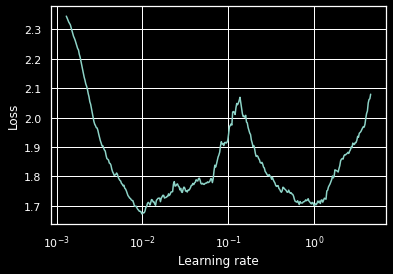

In [ ]:
runner.find_lr()

In [ ]:
runner.train(use_bestlr=True)

[ 2020-03-24 19:26:37,628 - sodium.sodium.base.base_trainer ] INFO: Starting training ...
[ 2020-03-24 19:26:37,630 - sodium.sodium.base.base_trainer ] INFO: Training the model for 50 epochs
[ 2020-03-24 19:26:37,631 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 1
[ 2020-03-24 19:26:37,632 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.009847580525585839



[ 2020-03-24 19:27:08,430 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 1
[ 2020-03-24 19:27:10,860 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 1.22729178, Accuracy: 56.07 (5607/10000)
[ 2020-03-24 19:27:10,863 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 2
[ 2020-03-24 19:27:10,865 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.009847580525585839



[ 2020-03-24 19:27:41,804 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 2
[ 2020-03-24 19:27:44,237 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.86624314, Accuracy: 69.56 (6956/10000)
[ 2020-03-24 19:27:44,238 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 3
[ 2020-03-24 19:27:44,241 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.009847580525585839



[ 2020-03-24 19:28:15,227 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 3
[ 2020-03-24 19:28:17,675 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.74465903, Accuracy: 75.03 (7503/10000)
[ 2020-03-24 19:28:17,677 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 4
[ 2020-03-24 19:28:17,678 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.009847580525585839



[ 2020-03-24 19:28:48,636 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 4
[ 2020-03-24 19:28:51,113 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.71724149, Accuracy: 75.82 (7582/10000)
[ 2020-03-24 19:28:51,117 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 5
[ 2020-03-24 19:28:51,120 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.009847580525585839



[ 2020-03-24 19:29:21,992 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 5
[ 2020-03-24 19:29:24,466 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.62304524, Accuracy: 78.91 (7891/10000)
[ 2020-03-24 19:29:24,469 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 6
[ 2020-03-24 19:29:24,470 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.009847580525585839



[ 2020-03-24 19:29:55,443 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 6
[ 2020-03-24 19:29:57,881 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.58360604, Accuracy: 80.35 (8035/10000)
[ 2020-03-24 19:29:57,886 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 7
[ 2020-03-24 19:29:57,887 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.009847580525585839



[ 2020-03-24 19:30:29,002 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 7
[ 2020-03-24 19:30:31,460 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.48751837, Accuracy: 84.05 (8405/10000)
[ 2020-03-24 19:30:31,462 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 8
[ 2020-03-24 19:30:31,470 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.009847580525585839



[ 2020-03-24 19:31:02,584 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 8
[ 2020-03-24 19:31:05,033 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.48709020, Accuracy: 83.68 (8368/10000)
[ 2020-03-24 19:31:05,034 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 9
[ 2020-03-24 19:31:05,035 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.009847580525585839



[ 2020-03-24 19:31:36,124 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 9
[ 2020-03-24 19:31:38,589 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.50309445, Accuracy: 83.15 (8315/10000)
[ 2020-03-24 19:31:38,591 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 10
[ 2020-03-24 19:31:38,592 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.009847580525585839



[ 2020-03-24 19:32:09,487 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 10
[ 2020-03-24 19:32:11,914 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.44897816, Accuracy: 84.72 (8472/10000)
[ 2020-03-24 19:32:11,916 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 11
[ 2020-03-24 19:32:11,919 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.009847580525585839



[ 2020-03-24 19:32:43,028 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 11
[ 2020-03-24 19:32:45,445 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.41551467, Accuracy: 86.26 (8626/10000)
[ 2020-03-24 19:32:45,447 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 12
[ 2020-03-24 19:32:45,451 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.009847580525585839



[ 2020-03-24 19:33:16,471 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 12
[ 2020-03-24 19:33:18,938 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.46678332, Accuracy: 84.86 (8486/10000)
[ 2020-03-24 19:33:18,940 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 13
[ 2020-03-24 19:33:18,945 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.009847580525585839



[ 2020-03-24 19:33:49,828 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 13
[ 2020-03-24 19:33:52,248 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.45955423, Accuracy: 85.03 (8503/10000)
[ 2020-03-24 19:33:52,250 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 14
[ 2020-03-24 19:33:52,253 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.009847580525585839



[ 2020-03-24 19:34:23,219 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 14
[ 2020-03-24 19:34:25,669 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.40188805, Accuracy: 86.59 (8659/10000)
[ 2020-03-24 19:34:25,671 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 15
[ 2020-03-24 19:34:25,672 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.009847580525585839



[ 2020-03-24 19:34:56,693 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 15
[ 2020-03-24 19:34:59,168 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.41078547, Accuracy: 86.69 (8669/10000)
[ 2020-03-24 19:34:59,172 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 16
[ 2020-03-24 19:34:59,175 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.009847580525585839



[ 2020-03-24 19:35:30,271 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 16
[ 2020-03-24 19:35:32,771 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.37675761, Accuracy: 87.69 (8769/10000)
[ 2020-03-24 19:35:32,776 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 17
[ 2020-03-24 19:35:32,777 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.009847580525585839



[ 2020-03-24 19:36:03,829 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 17
[ 2020-03-24 19:36:06,313 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.44432279, Accuracy: 85.90 (8590/10000)
[ 2020-03-24 19:36:06,314 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 18
[ 2020-03-24 19:36:06,317 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.009847580525585839



[ 2020-03-24 19:36:37,493 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 18
[ 2020-03-24 19:36:40,008 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.39588390, Accuracy: 86.72 (8672/10000)
[ 2020-03-24 19:36:40,010 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 19
[ 2020-03-24 19:36:40,011 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.009847580525585839



[ 2020-03-24 19:37:11,098 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 19
[ 2020-03-24 19:37:13,582 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.37901908, Accuracy: 87.74 (8774/10000)
[ 2020-03-24 19:37:13,585 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 20
[ 2020-03-24 19:37:13,588 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.009847580525585839



[ 2020-03-24 19:37:44,587 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 20
[ 2020-03-24 19:37:47,045 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.34971692, Accuracy: 88.31 (8831/10000)
[ 2020-03-24 19:37:47,047 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 21
[ 2020-03-24 19:37:47,055 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.009847580525585839



[ 2020-03-24 19:38:18,025 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 21
[ 2020-03-24 19:38:20,501 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.39987252, Accuracy: 87.19 (8719/10000)
[ 2020-03-24 19:38:20,503 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 22
[ 2020-03-24 19:38:20,508 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.009847580525585839



[ 2020-03-24 19:38:51,597 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 22
[ 2020-03-24 19:38:54,072 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.37706315, Accuracy: 87.69 (8769/10000)
[ 2020-03-24 19:38:54,075 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 23
[ 2020-03-24 19:38:54,078 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.009847580525585839



[ 2020-03-24 19:39:25,029 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 23
[ 2020-03-24 19:39:27,502 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.35229760, Accuracy: 88.55 (8855/10000)
[ 2020-03-24 19:39:27,503 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 24
[ 2020-03-24 19:39:27,504 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.009847580525585839



[ 2020-03-24 19:39:58,619 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 24
[ 2020-03-24 19:40:01,059 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.35942961, Accuracy: 88.38 (8838/10000)
[ 2020-03-24 19:40:01,061 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 25
[ 2020-03-24 19:40:01,062 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.0009847580525585839



[ 2020-03-24 19:40:32,139 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 25
[ 2020-03-24 19:40:34,592 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.25851882, Accuracy: 91.14 (9114/10000)
[ 2020-03-24 19:40:34,594 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 26
[ 2020-03-24 19:40:34,600 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.0009847580525585839



[ 2020-03-24 19:41:05,714 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 26
[ 2020-03-24 19:41:08,180 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.25661698, Accuracy: 91.41 (9141/10000)
[ 2020-03-24 19:41:08,182 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 27
[ 2020-03-24 19:41:08,182 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.0009847580525585839



[ 2020-03-24 19:41:39,310 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 27
[ 2020-03-24 19:41:41,801 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.25850912, Accuracy: 91.70 (9170/10000)
[ 2020-03-24 19:41:41,803 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 28
[ 2020-03-24 19:41:41,806 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.0009847580525585839



[ 2020-03-24 19:42:12,954 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 28
[ 2020-03-24 19:42:15,435 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.25591701, Accuracy: 91.79 (9179/10000)
[ 2020-03-24 19:42:15,437 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 29
[ 2020-03-24 19:42:15,439 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.0009847580525585839



[ 2020-03-24 19:42:46,472 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 29
[ 2020-03-24 19:42:48,902 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.26026687, Accuracy: 91.57 (9157/10000)
[ 2020-03-24 19:42:48,904 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 30
[ 2020-03-24 19:42:48,906 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.0009847580525585839



[ 2020-03-24 19:43:19,834 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 30
[ 2020-03-24 19:43:22,286 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.26019179, Accuracy: 91.68 (9168/10000)
[ 2020-03-24 19:43:22,289 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 31
[ 2020-03-24 19:43:22,292 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.0009847580525585839



[ 2020-03-24 19:43:53,316 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 31
[ 2020-03-24 19:43:55,708 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.26498052, Accuracy: 91.75 (9175/10000)
[ 2020-03-24 19:43:55,710 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 32
[ 2020-03-24 19:43:55,711 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 0.0009847580525585839



[ 2020-03-24 19:44:26,575 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 32
[ 2020-03-24 19:44:29,002 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.26015389, Accuracy: 91.85 (9185/10000)
[ 2020-03-24 19:44:29,005 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 33
[ 2020-03-24 19:44:29,006 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 9.84758052558584e-05



[ 2020-03-24 19:45:00,172 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 33
[ 2020-03-24 19:45:02,637 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.25675079, Accuracy: 91.89 (9189/10000)
[ 2020-03-24 19:45:02,639 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 34
[ 2020-03-24 19:45:02,640 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 9.84758052558584e-05



[ 2020-03-24 19:45:33,769 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 34
[ 2020-03-24 19:45:36,223 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.26098405, Accuracy: 91.99 (9199/10000)
[ 2020-03-24 19:45:36,225 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 35
[ 2020-03-24 19:45:36,231 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 9.84758052558584e-05



[ 2020-03-24 19:46:07,212 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 35
[ 2020-03-24 19:46:09,642 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.26137502, Accuracy: 91.85 (9185/10000)
[ 2020-03-24 19:46:09,645 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 36
[ 2020-03-24 19:46:09,646 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 9.84758052558584e-05



[ 2020-03-24 19:46:40,907 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 36
[ 2020-03-24 19:46:43,368 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.25858126, Accuracy: 91.79 (9179/10000)
[ 2020-03-24 19:46:43,370 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 37
[ 2020-03-24 19:46:43,374 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 9.84758052558584e-05



[ 2020-03-24 19:47:14,411 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 37
[ 2020-03-24 19:47:16,889 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.25627934, Accuracy: 91.92 (9192/10000)
[ 2020-03-24 19:47:16,890 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 38
[ 2020-03-24 19:47:16,896 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 9.84758052558584e-06



[ 2020-03-24 19:47:48,086 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 38
[ 2020-03-24 19:47:50,541 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.25265605, Accuracy: 91.94 (9194/10000)
[ 2020-03-24 19:47:50,543 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 39
[ 2020-03-24 19:47:50,549 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 9.84758052558584e-06



[ 2020-03-24 19:48:21,444 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 39
[ 2020-03-24 19:48:23,900 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.25456941, Accuracy: 91.93 (9193/10000)
[ 2020-03-24 19:48:23,902 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 40
[ 2020-03-24 19:48:23,906 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 9.84758052558584e-06



[ 2020-03-24 19:48:54,886 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 40
[ 2020-03-24 19:48:57,341 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.25504743, Accuracy: 92.03 (9203/10000)
[ 2020-03-24 19:48:57,343 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 41
[ 2020-03-24 19:48:57,344 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 9.84758052558584e-06



[ 2020-03-24 19:49:28,415 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 41
[ 2020-03-24 19:49:30,915 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.25792823, Accuracy: 91.87 (9187/10000)
[ 2020-03-24 19:49:30,917 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 42
[ 2020-03-24 19:49:30,918 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 9.84758052558584e-06



[ 2020-03-24 19:50:02,435 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 42
[ 2020-03-24 19:50:04,923 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.25313319, Accuracy: 91.90 (9190/10000)
[ 2020-03-24 19:50:04,926 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 43
[ 2020-03-24 19:50:04,927 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 9.84758052558584e-07



[ 2020-03-24 19:50:36,572 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 43
[ 2020-03-24 19:50:39,114 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.25331276, Accuracy: 91.96 (9196/10000)
[ 2020-03-24 19:50:39,116 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 44
[ 2020-03-24 19:50:39,118 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 9.84758052558584e-07



[ 2020-03-24 19:51:10,933 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 44
[ 2020-03-24 19:51:13,470 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.25852237, Accuracy: 91.90 (9190/10000)
[ 2020-03-24 19:51:13,472 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 45
[ 2020-03-24 19:51:13,477 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 9.84758052558584e-07



[ 2020-03-24 19:51:45,330 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 45
[ 2020-03-24 19:51:47,861 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.25372042, Accuracy: 91.88 (9188/10000)
[ 2020-03-24 19:51:47,863 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 46
[ 2020-03-24 19:51:47,864 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 9.84758052558584e-07



[ 2020-03-24 19:52:19,508 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 46
[ 2020-03-24 19:52:22,047 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.25301975, Accuracy: 91.92 (9192/10000)
[ 2020-03-24 19:52:22,049 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 47
[ 2020-03-24 19:52:22,050 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 9.84758052558584e-07



[ 2020-03-24 19:52:54,018 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 47
[ 2020-03-24 19:52:56,554 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.25898594, Accuracy: 91.96 (9196/10000)
[ 2020-03-24 19:52:56,556 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 48
[ 2020-03-24 19:52:56,560 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 9.847580525585842e-08



[ 2020-03-24 19:53:28,525 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 48
[ 2020-03-24 19:53:31,044 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.25509975, Accuracy: 91.91 (9191/10000)
[ 2020-03-24 19:53:31,046 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 49
[ 2020-03-24 19:53:31,047 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 9.847580525585842e-08



[ 2020-03-24 19:54:02,782 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 49
[ 2020-03-24 19:54:05,296 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.25281072, Accuracy: 91.93 (9193/10000)
[ 2020-03-24 19:54:05,299 - sodium.sodium.base.base_trainer ] INFO: Training Epoch: 50
[ 2020-03-24 19:54:05,302 - sodium.sodium.base.base_trainer ] INFO: LR was set to : 9.847580525585842e-08



[ 2020-03-24 19:54:36,945 - sodium.sodium.base.base_trainer ] INFO: Testing Epoch: 50
[ 2020-03-24 19:54:39,406 - sodium.sodium.trainer.trainer ] INFO: Test Set: Average Loss: 0.26788317, Accuracy: 91.95 (9195/10000)
[ 2020-03-24 19:54:39,408 - sodium.sodium.runner ] INFO: Finished!


## Plot the metrics

[ 2020-03-24 19:58:25,363 - sodium.sodium.runner ] INFO: Plotting Metrics...


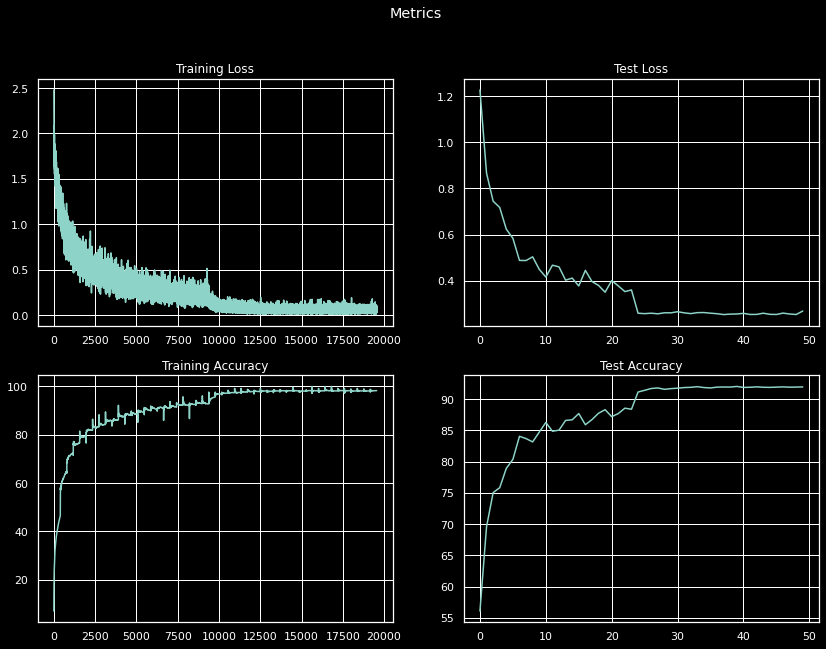

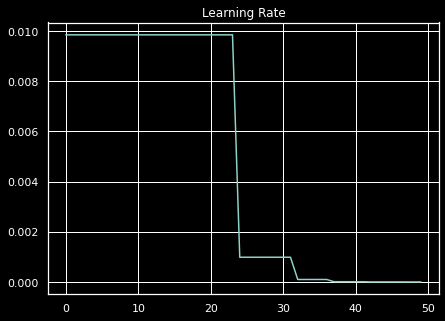

In [ ]:
runner.plot_metrics()

## Plot Grad-CAM

In [ ]:
target_layers = ["layer1", "layer2", "layer3", "layer4"]

[ 2020-03-24 19:58:35,806 - sodium.sodium.runner ] INFO: Plotting Grad-CAM...
[ 2020-03-24 19:58:36,176 - sodium.sodium.runner ] INFO: Taking {5} samples
[ 2020-03-24 19:58:36,225 - sodium.sodium.gradcam.gradcam ] INFO: generating Grad-CAM for layer1
[ 2020-03-24 19:58:36,233 - sodium.sodium.gradcam.gradcam ] INFO: generating Grad-CAM for layer2
[ 2020-03-24 19:58:36,234 - sodium.sodium.gradcam.gradcam ] INFO: generating Grad-CAM for layer3
[ 2020-03-24 19:58:36,236 - sodium.sodium.gradcam.gradcam ] INFO: generating Grad-CAM for layer4


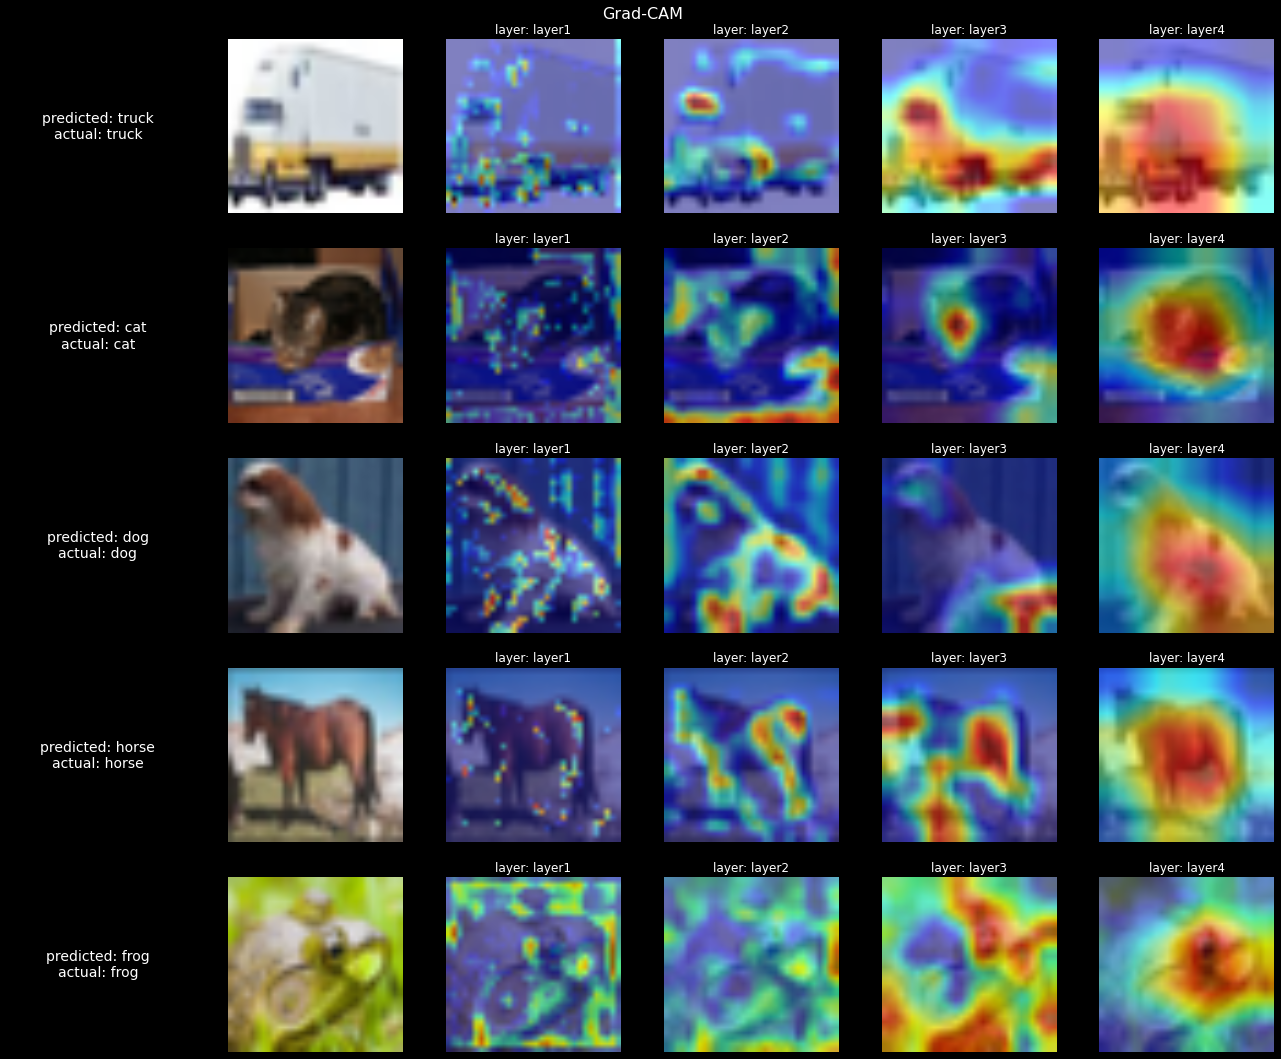

In [ ]:
runner.plot_gradcam(target_layers=target_layers)

## Plot the misclassifications grad-cam

[ 2020-03-24 19:58:45,750 - sodium.sodium.runner ] INFO: getting misclassifications
[ 2020-03-24 19:58:48,232 - sodium.sodium.runner ] INFO: Taking {25} samples
[ 2020-03-24 19:58:48,248 - sodium.sodium.gradcam.gradcam ] INFO: generating Grad-CAM for layer1
[ 2020-03-24 19:58:48,249 - sodium.sodium.gradcam.gradcam ] INFO: generating Grad-CAM for layer2
[ 2020-03-24 19:58:48,250 - sodium.sodium.gradcam.gradcam ] INFO: generating Grad-CAM for layer3
[ 2020-03-24 19:58:48,252 - sodium.sodium.gradcam.gradcam ] INFO: generating Grad-CAM for layer4


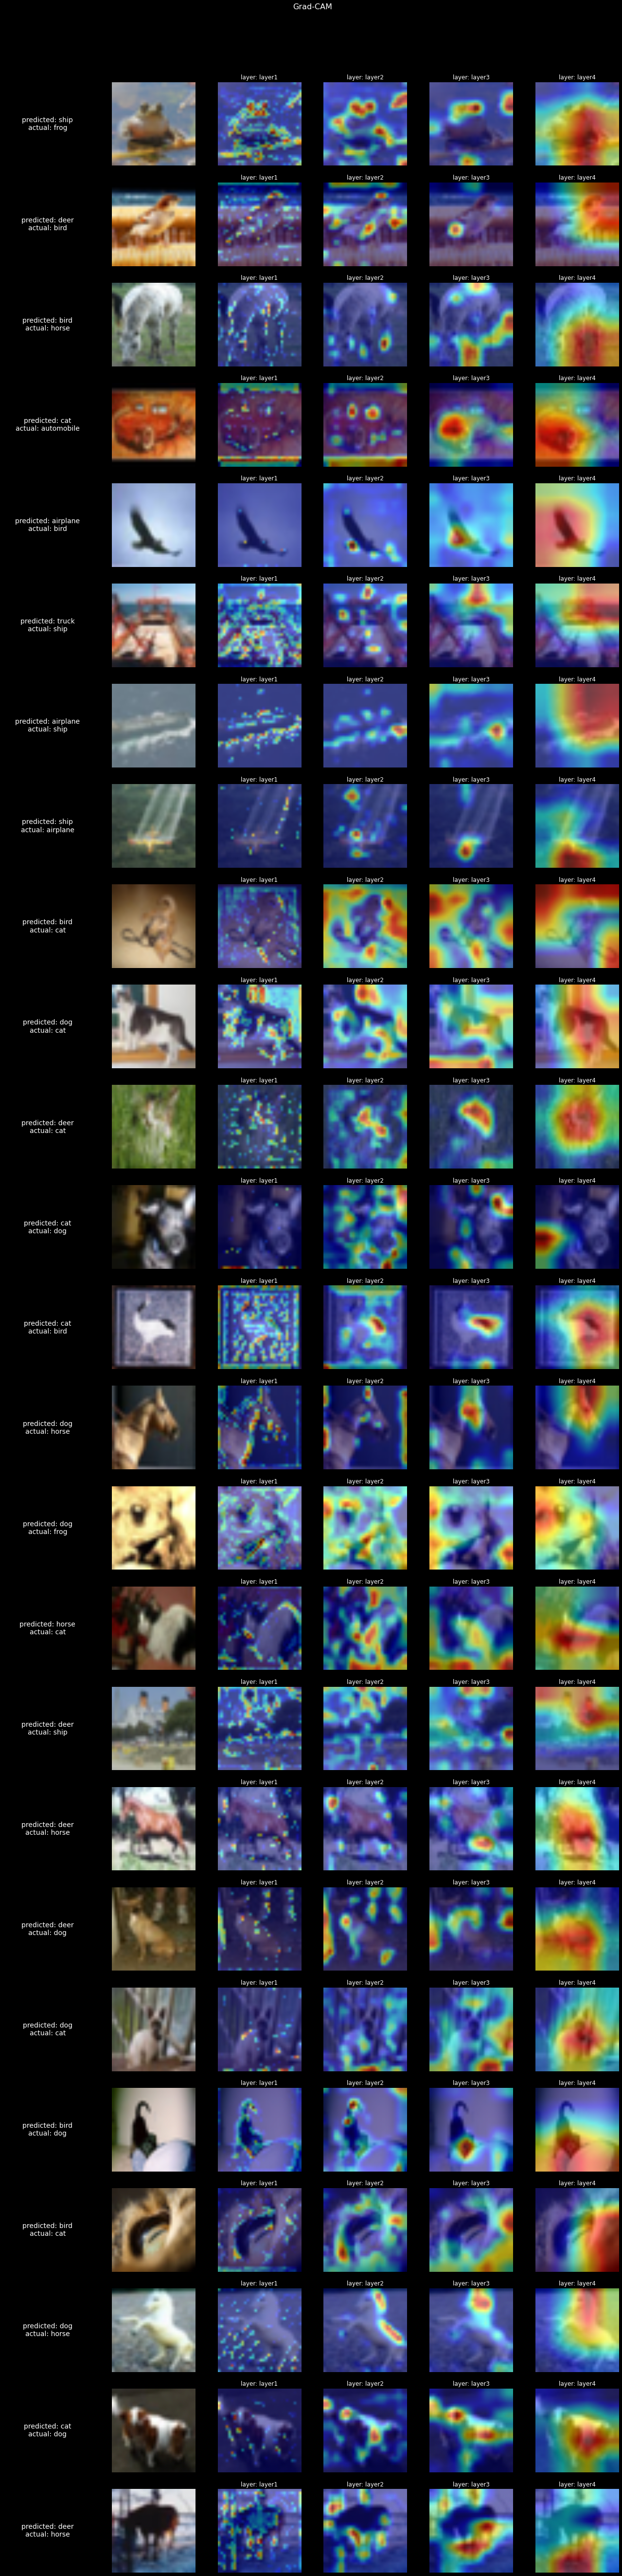

In [ ]:
runner.plot_misclassifications(target_layers=target_layers)